<a href="https://colab.research.google.com/github/theokunj/practice/blob/main/ME_HW1_img_proc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/ME5920/Agricultural_Image_Analytics/Agricultural_Image_Analytics/leaves/'
#https://drive.google.com/drive/folders/1ZArURlOz1LOykEDGrMhX3bbwReauGh48?usp=drive_link

In [ ]:
#from torchvision.datasets import MNIST as mnist
#import torchvision.utils as tv_utils
#import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
from PIL import Image
from IPython.display import display


In [ ]:
#LOAD IMAGE/S
img_names = ['I1.png','I2.png','I3.png','I4.png','I5.png' ]
image_path = os.path.join(filepath, img_names[1])
#image_path = '/content/drive/MyDrive/Colab Notebooks/ME5920/Agricultural_Image_Analytics/Agricultural_Image_Analytics/leaves/I1.png'
img = cv.imread(image_path,1)


if img is None:
    print("Error")
else:
    print(img.shape)

h,w,_ = img.shape
print(h,w,_)


(391, 343, 3)
391 343 3


## PRACTICE: test each transforamtion on a single image

fx:  0.76 fy:  0.98


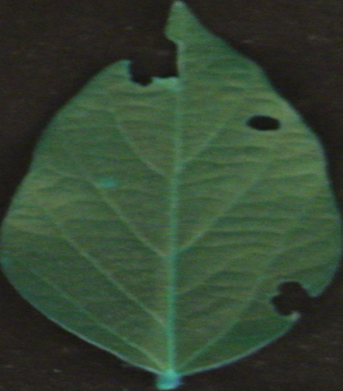

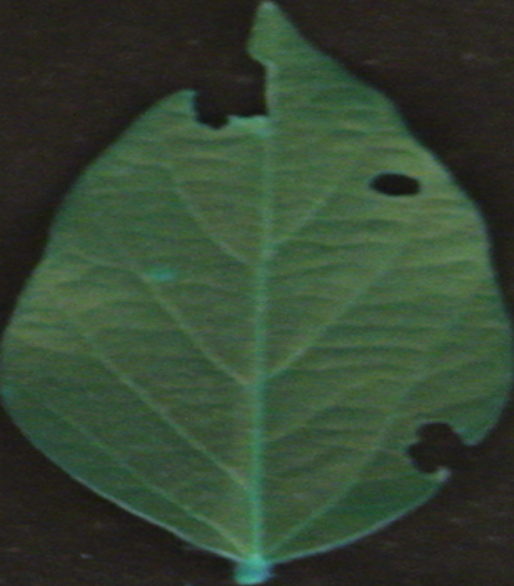

(586, 514, 3)


In [ ]:
#Resize image by random

rng = np.random.default_rng()
fx, fy = round(rng.random(), 2), round(rng.random(),2)
#fx = np.random.random(0.0,1.0)#, np.random.random(0.0,1.0)
print('fx: ',fx, 'fy: ',fy)

#resize the image on random scale for h and w (fy and fx)

display(Image.fromarray(img))
res_img = cv.resize(img, dsize=None, fx=1.5,  fy =1.5, interpolation=cv.INTER_CUBIC)
display(Image.fromarray(res_img))
print(res_img.shape)

#Shift
print(h, w)

#transformation matrix to new position at tx,ty
#x , ty = round(w * rng.random()), round(h * rng.random())
#print(tx,ty)

#transformation matrix
tx = round((w*np.random.uniform(low=0.1, high =0.4)))
ty = round((h*np.random.uniform(low=0.1, high =0.4)))
#m = np.float32([[1, 0, round(w * np.random.uniform(low= 0.4, high = 0.9))],[0, 1, round(h * np.random.uniform(low= 0.4, high = 0.9))]])
m = np.float32([[1,0,tx],[0,1,ty]])
print(m)
shifted = cv.warpAffine(img, m,(w,h))
display(Image.fromarray(shifted))


#Rotation

#cols-1 and rows-1 are the coordinate limits
# h= rows, w = cols

#random degree
deg = round(np.random.uniform(15,345))
print(deg)

M = cv.getRotationMatrix2D(((w-1)/2.0, (h-1)/2.0),deg,1)
rotatio = cv.warpAffine(img, M, (w,h))
display(Image.fromarray(rotatio))

#Warp (currently only by fixed points)
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)

warped = cv.warpAffine(img,M,(w,h))
display(Image.fromarray(warped))


In [ ]:
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp')
all_files = os.listdir(filepath)
image_files = [f for f in all_files if f.lower().endswith(image_extensions)]

print(f"Found {len(image_files)} image files:")
for img_file in image_files:
    print(img_file)

Found 8 image files:
I7.png
I4.png
I5.png
I8.png
I2.png
I3.png
I1.png
I6.png


##$ Random Transformation Function


In [ ]:
import random

def apply_random_transformations(img, h=None, w=None):
    if h is None or w is None:
        h, w, _ = img.shape

    transformed_img = img.copy()

    # Define possible transformations as a list of functions
    transformations = []

    # 1. Resize transformation
    def resize_transform(current_img):
        fx, fy = np.random.uniform(0.7, 1.3), np.random.uniform(0.7, 1.3)
        return cv.resize(current_img, dsize=None, fx=fx, fy=fy, interpolation=cv.INTER_CUBIC)
    transformations.append(resize_transform)

    # 2. Shift transformation
    def shift_transform(current_img):
        tx = round((w * np.random.uniform(low=-0.2, high=0.2)))
        ty = round((h * np.random.uniform(low=-0.2, high=0.2)))
        m_shift = np.float32([[1, 0, tx], [0, 1, ty]])
        return cv.warpAffine(current_img, m_shift, (w, h), borderValue=(0,0,0))
    transformations.append(shift_transform)

    # 3. Rotation transformation
    def rotate_transform(current_img):
        deg = np.random.uniform(-45, 45)
        M_rot = cv.getRotationMatrix2D(((w - 1) / 2.0, (h - 1) / 2.0), deg, 1)
        return cv.warpAffine(current_img, M_rot, (w, h), borderValue=(0,0,0))
    transformations.append(rotate_transform)

    # 4. Affine Warp transformation
    def affine_warp_transform(current_img):
        pts1 = np.float32([[0, 0], [w - 1, 0], [0, h - 1]])
        pts2 = np.float32([
            [np.random.uniform(0, w * 0.1), np.random.uniform(0, h * 0.1)],
            [np.random.uniform(w * 0.9, w - 1), np.random.uniform(0, h * 0.1)],
            [np.random.uniform(0, w * 0.1), np.random.uniform(h * 0.9, h - 1)]
        ])
        M_affine = cv.getAffineTransform(pts1, pts2)
        return cv.warpAffine(current_img, M_affine, (w, h), borderValue=(0,0,0))
    transformations.append(affine_warp_transform)

    # Randomly select a subset of transformations (at least one, up to all)
    num_transforms_to_apply = random.randint(1, len(transformations))
    selected_transforms = random.sample(transformations, num_transforms_to_apply)

    # Apply selected transformations sequentially
    for transform_func in selected_transforms:
        transformed_img = transform_func(transformed_img)

    return transformed_img

print("Defined 'apply_random_transformations' function.")

Defined 'apply_random_transformations' function.



resize (+- 30%), shift (-20% to +20% of width/height), rotation (between -45 and 45 deg), and affine warp (up to 10% of image dimensions).

## Create Augmented Images Directory



In [ ]:
augmented_images_dir = os.path.join(filepath, 'augmented_images')
os.makedirs(augmented_images_dir, exist_ok=True)
print(f"Created directory: {augmented_images_dir}")

Created directory: /content/drive/MyDrive/Colab Notebooks/ME5920/Agricultural_Image_Analytics/Agricultural_Image_Analytics/leaves/augmented_images


### Iterate 100 times to generate augmented images

In [ ]:
num_augmented_images = 100

for i in range(num_augmented_images):
    # Randomly select an image from the list of identified image files
    selected_img_name = random.choice(image_files)
    original_image_path = os.path.join(filepath, selected_img_name)

    # Load the image
    img_bgr = cv.imread(original_image_path, 1)

    if img_bgr is None:
        print(f"Error loading image {selected_img_name}. Skipping augmentation for this instance.")
        continue

    # Convert BGR to RGB
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)


    h, w, _ = img_rgb.shape

    # Apply random transformations
    transformed_img_rgb = apply_random_transformations(img_rgb, h, w)

    # Generate a unique filename for the augmented image
    base_name = os.path.splitext(selected_img_name)[0] # Get name without extension
    extension = os.path.splitext(selected_img_name)[1] # Get extension
    augmented_filename = f"{base_name}_augmented_{i:03d}{extension}"
    augmented_save_path = os.path.join(augmented_images_dir, augmented_filename)

    # Convert RGB back to BGR before saving with cv.imwrite
    transformed_img_bgr = cv.cvtColor(transformed_img_rgb, cv.COLOR_RGB2BGR)

    # Save the transformed image
    cv.imwrite(augmented_save_path, transformed_img_bgr)

    if (i + 1) % 10 == 0 or i == num_augmented_images - 1:
        print(f"Generated {i + 1}/{num_augmented_images} augmented images. Saved last as: {augmented_filename}")

print(f"Successfully generated {num_augmented_images} augmented images in '{augmented_images_dir}'.")

Generated 10/100 augmented images. Saved last as: I3_augmented_009.png
Generated 20/100 augmented images. Saved last as: I2_augmented_019.png
Generated 30/100 augmented images. Saved last as: I8_augmented_029.png
Generated 40/100 augmented images. Saved last as: I3_augmented_039.png
Generated 50/100 augmented images. Saved last as: I2_augmented_049.png
Generated 60/100 augmented images. Saved last as: I1_augmented_059.png
Generated 70/100 augmented images. Saved last as: I7_augmented_069.png
Generated 80/100 augmented images. Saved last as: I5_augmented_079.png
Generated 90/100 augmented images. Saved last as: I1_augmented_089.png
Generated 100/100 augmented images. Saved last as: I7_augmented_099.png
Successfully generated 100 augmented images in '/content/drive/MyDrive/Colab Notebooks/ME5920/Agricultural_Image_Analytics/Agricultural_Image_Analytics/leaves/augmented_images'.


#Patches

Displaying a sample patch:


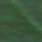

Generated 80 patches (10 patches from each of 8 images).


In [ ]:
patch_w, patch_h = 42, 42  # Fixed patch size of w/8
patch_per_img = 10

#make new directory
os.makedirs('patches', exist_ok=True)
all_patches = [] #store all patches in array

for img_name in image_files:
    # Load the image
    image_path = os.path.join(filepath, img_name)
    img_bgr = cv.imread(image_path, 1)

    if img_bgr is None:
        print(f"Error loading image {img_name}. Skipping.")
        continue

    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB) # Convert BGR to RGB
    h, w, _ = img_rgb.shape

    if h < patch_h or w < patch_w:
        print(f"Image {img_name} is too small for a {patch_h}x{patch_w} patch. Skipping.")
        continue

    for i in range(patch_per_img):
        # Randomly select top-left corner for the patch
        y = np.random.randint(0, h - patch_h + 1)
        x = np.random.randint(0, w - patch_w + 1)

        patch = img_rgb[y : y + patch_h, x : x + patch_w]
        all_patches.append(patch)

# Display a sample patch (optional, can be commented out if too many)
if len(all_patches) > 0:
    print("Displaying a sample patch:")
    display(Image.fromarray(random.choice(all_patches)))

print(f"Generated {len(all_patches)} patches (10 patches from each of {len(image_files)} images).")

# ZCA Whitening

## Step 1: Implement PCA


In [ ]:
patches_array = np.array(all_patches)

# Reshape each patch (height x width x channels) into a single row vector
# Number of patches x (height * width * channels)
num_patches, h, w, c = patches_array.shape
flattened_patches = patches_array.reshape(num_patches, h * w * c)

print(f"Shape of patches_array: {patches_array.shape}")
print(f"Shape of flattened patches: {flattened_patches.shape}")

# Instantiate PCA (without specifying n_components yet)
pca = PCA()

# Fit PCA to the flattened patches
pca.fit(flattened_patches)

print("PCA model fitted successfully.")

Shape of patches_array: (80, 42, 42, 3)
Shape of flattened patches: (80, 5292)
PCA model fitted successfully.


Explained variance ratio (first 5 components): [0.70364377 0.08017078 0.04189383 0.03065823 0.01674919]
Cumulative explained variance (first 5 components): [0.70364377 0.78381455 0.82570837 0.8563666  0.87311579]


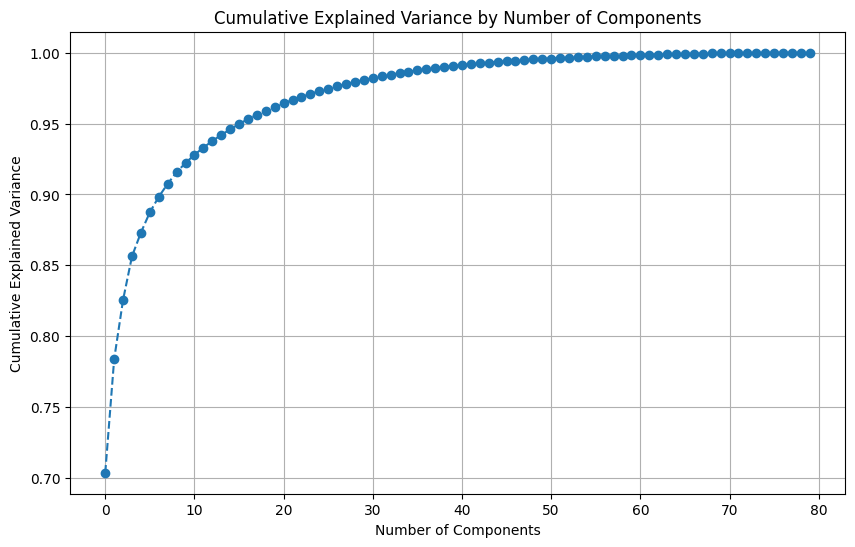

In [ ]:
# @title
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio (first 5 components): {explained_variance_ratio[:5]}")

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(f"Cumulative explained variance (first 5 components): {cumulative_explained_variance[:5]}")

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [ ]:
pca_reduced = PCA(n_components=8)
pca_reduced.fit(flattened_patches)
pca_transformed_patches = pca_reduced.transform(flattened_patches)

print(f"Shape of original flattened patches: {flattened_patches.shape}")
print(f"Shape of PCA transformed patches (8 components): {pca_transformed_patches.shape}")

Shape of original flattened patches: (80, 5292)
Shape of PCA transformed patches (8 components): (80, 8)


## Apply ZCA Whitening

Apply ZCA whitening to the PCA-transformed data


In [ ]:
def zca_whiten(data, epsilon=1e-5):
    # 1. Mean subtract the data
    mean = np.mean(data, axis=0)
    data_centered = data - mean

    # 2. Compute the covariance matrix
    # cov = np.dot(data_centered.T, data_centered) / (data.shape[0] - 1) # using N-1 for sample covariance
    cov = np.cov(data_centered, rowvar=False) # rowvar=False means columns are variables

    # 3. Perform SVD on the covariance matrix
    U, S, V = np.linalg.svd(cov)

    # 4. Compute the ZCA whitening matrix
    # Ensure S is not too small to avoid division by zero issues
    ZCAMatrix = np.dot(np.dot(U, np.diag(1.0 / np.sqrt(S + epsilon))), U.T)

    # 5. Whiten the data
    whitened_data = np.dot(data_centered, ZCAMatrix)
    return whitened_data

# Apply ZCA whitening to the PCA-transformed data
zca_whitened_pca_patches = zca_whiten(pca_transformed_patches, epsilon=0.1)

print(f"Shape of ZCA whitened PCA patches: {zca_whitened_pca_patches.shape}")

Shape of ZCA whitened PCA patches: (80, 8)


## Visualize ZCA Whitened Patches



In [ ]:
reconstructed_pca_patches = pca_reduced.inverse_transform(zca_whitened_pca_patches)
print(f"Shape of reconstructed PCA patches (before reshaping): {reconstructed_pca_patches.shape}")

Shape of reconstructed PCA patches (before reshaping): (80, 5292)


Shape of reconstructed images: (80, 42, 42, 3)
Displaying a selection of ZCA whitened patches:


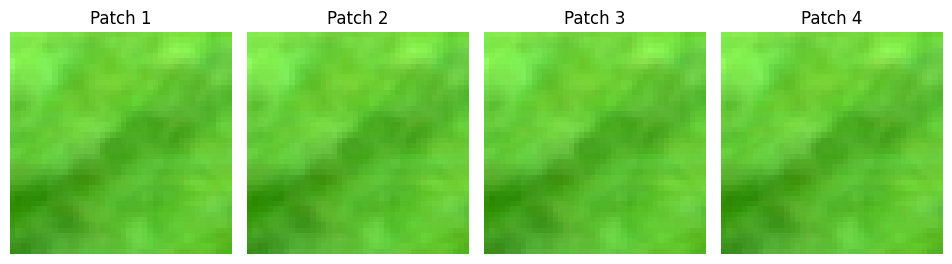

In [ ]:
num_patches, feature_dim = reconstructed_pca_patches.shape

# Reshape back to original patch dimensions (h, w, c)
# We use the h, w, c from the original flattened_patches setup
# Assuming patch_h, patch_w, c are still available from previous cells
reconstructed_images = reconstructed_pca_patches.reshape(num_patches, patch_h, patch_w, c)

print(f"Shape of reconstructed images: {reconstructed_images.shape}")

# Normalize pixel values to 0-255 and convert to uint8 for display
# Find min and max for scaling
min_val = reconstructed_images.min()
max_val = reconstructed_images.max()

# Scale to 0-1 range, then to 0-255
normalized_images = (reconstructed_images - min_val) / (max_val - min_val) * 255
normalized_images = normalized_images.astype(np.uint8)

print("Displaying a selection of ZCA whitened patches:")

# Display a selection of patches
num_to_display = 4
plt.figure(figsize=(12, 6))
for i in range(num_to_display):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(normalized_images[i])
    plt.title(f'Patch {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

*   PCA Application: Image patches (80 instances, 42x42x3 pixels) were flattened into a 2D array of shape (80, 5292) for PCA.

5292 features to 8 principal components: transformed data of shape (80, 8).
*   ZCA Whitening + Visual Inspection of Whitened Patches


In [ ]:
patches_array = np.array(all_patches)

# Get dimensions from the first patch to ensure consistency
# Assuming all patches have the same dimensions based on how they were generated
if patches_array.size > 0:
    num_patches, patch_h, patch_w, num_channels = patches_array.shape
else:
    print("No patches found in all_patches list. Cannot proceed.")
    exit()

# Reshape to (total_number_of_pixels, 3)
# total_number_of_pixels = num_patches * patch_h * patch_w
original_pixel_data = patches_array.reshape(-1, num_channels)

print(f"Shape of patches_array: {patches_array.shape}")
print(f"Shape of original_pixel_data (total pixels, RGB channels): {original_pixel_data.shape}")

Shape of patches_array: (80, 42, 42, 3)
Shape of original_pixel_data (total pixels, RGB channels): (141120, 3)


#Task 5: Channel distribution of Original image

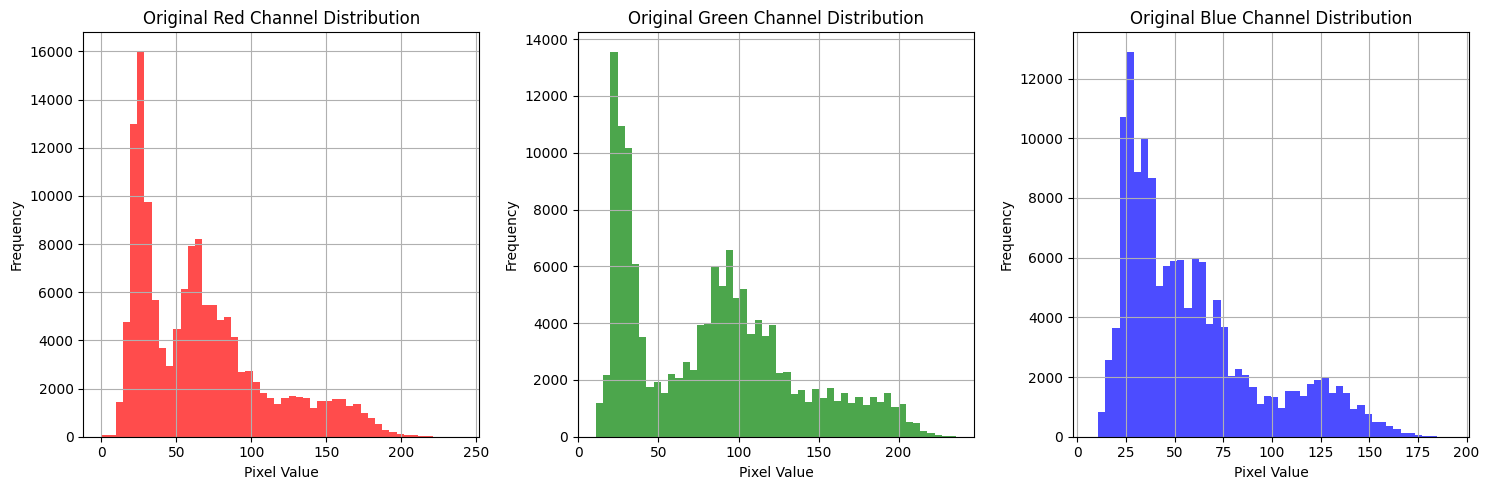

Plotted distributions for original R, G, B channels.


In [ ]:
r_channel_original = original_pixel_data[:, 0]
g_channel_original = original_pixel_data[:, 1]
b_channel_original = original_pixel_data[:, 2]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(r_channel_original, bins=50, color='red', alpha=0.7)
plt.title('Original Red Channel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(g_channel_original, bins=50, color='green', alpha=0.7)
plt.title('Original Green Channel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(b_channel_original, bins=50, color='blue', alpha=0.7)
plt.title('Original Blue Channel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Plotted distributions for original R, G, B channels.")

#Task 4: Channel distribution of Prewhitened image

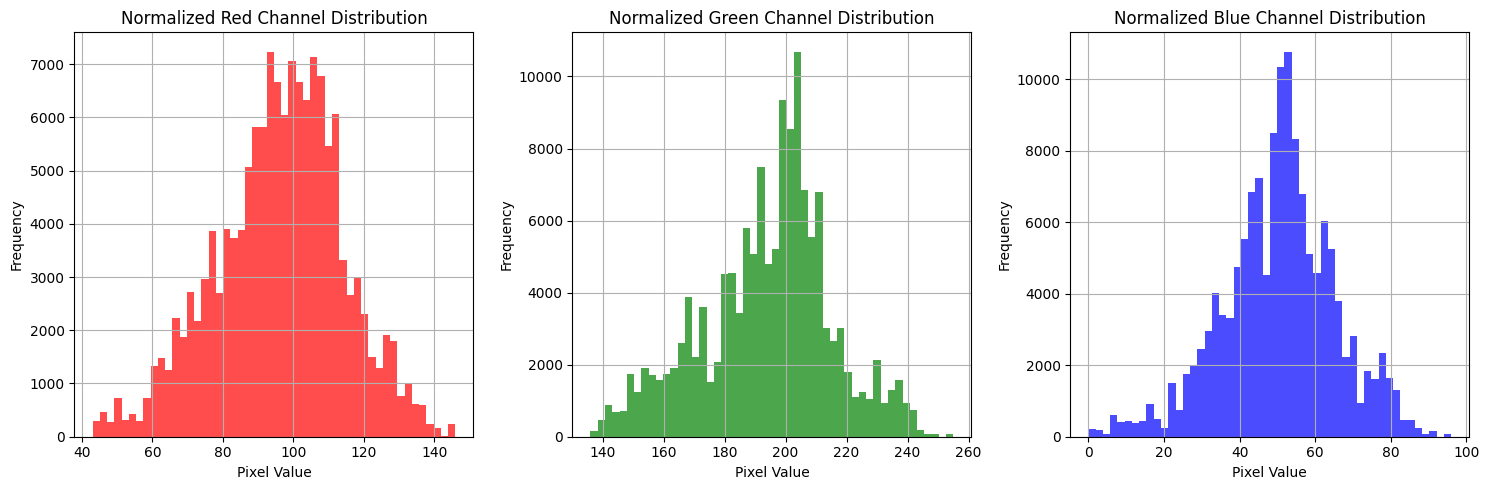

Plotted distributions for ZCA-whitened (normalized) R, G, B channels.


In [ ]:
num_patches, patch_h, patch_w, num_channels = normalized_images.shape

# Reshape normalized_images to (total_number_of_pixels, 3)
normalized_pixel_data = normalized_images.reshape(-1, num_channels)

r_channel_normalized = normalized_pixel_data[:, 0]
g_channel_normalized = normalized_pixel_data[:, 1]
b_channel_normalized = normalized_pixel_data[:, 2]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(r_channel_normalized, bins=50, color='red', alpha=0.7)
plt.title('Normalized Red Channel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(g_channel_normalized, bins=50, color='green', alpha=0.7)
plt.title('Normalized Green Channel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(b_channel_normalized, bins=50, color='blue', alpha=0.7)
plt.title('Normalized Blue Channel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Plotted distributions for ZCA-whitened (normalized) R, G, B channels.")